![](images/notebook-images/neural-network-handwritten-digits/network_clint-adair_unsplash.jpg){fig-align="center"}

<center><a href = "https://unsplash.com/photos/BW0vK-FA3eg">Unsplash | Clint Adair</a></center>

# Introduction

Neural networks are a class of machine learning models that take inspiration from biological neurons. One network is made up of multiple neurons, which can be visualized as nodes connected to each other with lines. In order to make a prediction, data is fed into input neurons, then various calculations are performed as it passes through the other neurons, until a final output value is reached.

One main advantage of using a neural network is that it uses nonlinear activation functions. These are functions are "nonlinear" in the sense that the relationship between x (the input) and y (the output) does not form a straight line. For example, the logistic or sigmoid ($\sigma$) function, as well as the $\tanh$ function, have an S-shaped curve which makes them suited for classification tasks. The ReLU (Rectified Linear Unit) function, $ReLU(x) = max(0, x)$, returns 0 if the input is less than or equal to 0, thus making the shape of the function look like a bent line.

Because these functions are nonlinear, the model is able to find nonlinear relationships between the features (the variables used to make a prediction) and the target (the variable that we want to predict). Thus, it can be more accurate than a linear regression in many scenarios.

Furthermore, a neural network can be built with "hidden layers": layers of neurons between the input neurons and the output neurons. These add additional depth to the model. Thus, the neural network can potentially make more accurate predictions than other models that also use nonlinear functions.

In this project, I will compare the performance of a neural network and another type of model (K Nearest Neighbors) in predicting the labels of images of handwritten digits (as in, digits from 0 to 9). Furthermore, I will demonstrate how scikit-learn's Grid Search feature can be used for hyperparameter optimization for both models.

:::{.callout-note}

I wrote this notebook by following a guided project on the [Dataquest](https://www.dataquest.io/) platform, specifically the [Guided Project: Building a Handwritten Digits Classifier](https://app.dataquest.io/c/50/m/244/guided-project%3A-building-a-handwritten-digits-classifier/1/introduction). The general project flow and research questions were guided by Dataquest. Other than what was instructed, I also added my own steps. You can visit the [official solution](https://github.com/dataquestio/solutions/blob/master/Mission244Solutions.ipynb) to compare it to my project.

:::

Below are the packages used in this project.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import GridSearchCV

# The Dataset

The dataset for this project is the Optical Recognition of Handwritten Digits dataset. This dataset comes with the scikit-learn package in Python, though it can also be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), where it was donated by Alpaydin and Kaynak in 1998. It contains 1797 different images of handwritten digits.

Let us inspect the first 5 rows of the features.

In [11]:
#| code-fold: true
X, y = load_digits(
    n_class = 10,
    return_X_y = True,
    as_frame = True,
)

X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Each row represents a different black-and-white image of a handwritten digit. Each column represents the value of a pixel. For example, if you imagine the pixels arranged in a grid, `pixel_0_0` represents the value of the pixel in the top left of the image (first row, first column). Then, `pixel_0_1` represents the pixel in the first row and second column, and so on.

Below, I have reconstructed the first 10 images in the dataset using the pixel data.

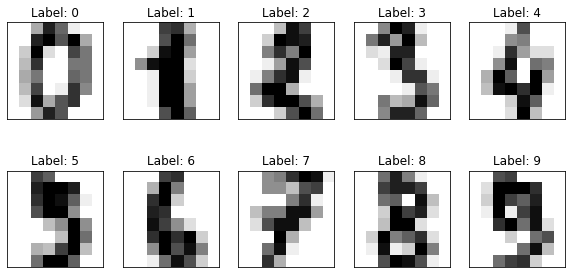

In [12]:
#| code-fold: true
sample_indices = range(10)

fig, axes = plt.subplots(2, 5, figsize = (10, 5))
# Flatten the 2darray into a 1darray so that I can index it with just one axis.
axes = axes.flatten()

for i in range(10):

    # Convert a row of data into a 1darray, then reshape it into a 2darray.
    sample_image = X.iloc[i].to_numpy().reshape(8, 8)
    sample_label = y.iloc[i]

    # current subplot
    sp = axes[i]

    sp.imshow(sample_image, cmap = "gray_r")
    sp.set_title(f"Label: {sample_label}")

    # Remove all ticks except one, at y = 0, and make its label blank.
    # This is done because ticks and tick labels are unnecessary.
    # I had to leave one tick in place to avoid an error where the background becomes transparent.
    sp.set_xticks([])
    sp.set_yticks([0.0])
    sp.set_yticklabels([""])

    # Make the length of the remaining tick 0 so it is invisible.
    sp.tick_params(axis = "both", length = 0.0)

plt.show()

Each image has a low resolution because it only contains 64 pixels in an 8-by-8 grid. Above each image, I displayed its label (in other words, the actual value of the handwritten digit).

Later on in this project, the goal of the machine learning models will be to look at the images and predict their labels.

Below, I have displayed a frequency table of the labels.

In [13]:
#| code-fold: true
print("Frequency Table of Labels")
y.value_counts().sort_index()

Frequency Table of Labels


0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

All digits from 0 to 9 are present in the dataset. Furthermore, there are around 180 images for each label. The dataset seems balanced; that is, the labels are equally distributed.

Now that I understand the contents of the dataset, I can move on to the machine learning models.

# K Nearest Neighbors

Before I use neural networks, I will use the K Nearest Neighbors (KNN) algorithm for comparison. This algorithm determines the *similarity* of a test observation to the training observations, then uses the most similar training observations ("nearest neighbors") to make a prediction. For more details on this algorithm, you can visit my past project, [Predicting Car Prices using the K Nearest Neighbors Algorithm](2021-12-21-Predicting-Car-Prices-K-Nearest-Neighbors.ipynb).

Before evaluating the model, I will first perform hyperparameter optimization. This means that I will try to find the optimal "settings" for the model, which will make it perform better. These settings are unrelated to the data being used to train the model.

In the case of KNN, I am concerned with the `n_neighbors` hyperparameter, which determines how many of the "nearest neighbors" are used to make a prediction. If this value is too low, the model may not have enough information to make a good prediction. If the value is too high, the model may make a prediction that is very far from the real value. Thus, I have to test various values.

Below is a list of the values that I will test.

In [14]:
#| code-fold: true
# 1 to 10, then 10 to 200 with skips of 10
k_list = list(range(1, 10, 1)) + list(range(10, 201, 10))

knn_param_grid = [{
    "n_neighbors": k_list
}]

print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


The code below uses scikit-learn's `GridSearchCV` feature. It takes the grid of the parameter values that I want to try. Then, it tests the model using the different values, and records the model performance. It then identifies the best model based on performance.

In this case, I will use accuracy as my performance metric. This refers to the number of correct predictions divided by the total number of predictions.

In [15]:
#| code-fold: true
# grid search for knn

skf = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 0,
)

gs_knn = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    scoring = "accuracy",
    cv = skf,
)

gs_knn.fit(X, y)

gs_knn.best_params_

{'n_neighbors': 3}

The result above tells me that the Grid Search determined that the model with `n_neighbors = 3` had the best accuracy compared to models with other values.

Below is a graph that shows how the accuracy changed as the `n_neighbors` parameter changed.

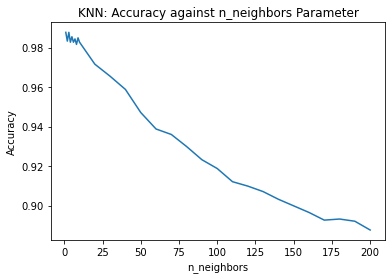

In [16]:
#| code-fold: true
gs_knn_results = pd.DataFrame(gs_knn.cv_results_)

sns.lineplot(
    data = gs_knn_results,
    x = "param_n_neighbors",
    y = "mean_test_score",
)
plt.title("KNN: Accuracy against n_neighbors Parameter")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

Clearly, the general trend is that as the number of neighbors increased, the accuracy decreased. This makes sense because if too many neighbors are used, some of the neighbors may be very different from the observation for which we are trying to make a prediction.

Next, I will use scikit-learn's `cross_validate` feature to obtain multiple performance metrics about the best KNN model that Grid Search found.

In [26]:
#| code-fold: true
def stratified_5fcv(model, X, y, skf):

    metrics = [
        "accuracy",
        "recall_weighted",
        "precision_weighted",
        "f1_weighted",
    ]

    scores_dict = cross_validate(
        estimator = model,
        X = X,
        y = y,
        scoring = metrics,
        cv = skf,
    )

    scores_df = pd.DataFrame(scores_dict)

    mean_results = (
        scores_df
        .loc[:, [col for col in scores_df if col.startswith("test")]]
        .mean(axis = 0)
    )

    return mean_results

# This will use the best estimator found.
scores_knn = stratified_5fcv(gs_knn.best_estimator_, X, y, skf)

print("K Nearest Neighbors")
scores_knn

K Nearest Neighbors


test_accuracy              0.987758
test_recall_weighted       0.987758
test_precision_weighted    0.988019
test_f1_weighted           0.987729
dtype: float64

Above, I have displayed the mean scores of the KNN model from cross-validation. All of the scores were over 98%, which means that the model performed very well.

I used multiple metrics for the sake of displaying the ability of `cross_validate` to measure multiple metrics. However, I will not go over these individually. For more information on recall, precision, and F1 score, visit my past project, [Naive Bayes Algorithm for Detecting Spam Messages](2021-12-14-Naive-Bayes-Algorithm-Detecting-Spam-Messages.ipynb), and scroll down to "Recall, Precision, F1."

Note that I used the "weighted" versions of some of the metrics. This is helpful when the labels are imbalanced. In the case of this project, there is slight imbalance, as each digit has around 175 to 185 images in the dataset.

For a general guide on scikit-learn metrics, visit the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

Moving on, let's compare the KNN model to a neural network.

# Neural Network

Like with KNN, I will first perform hyperparameter optimization. I will focus on three hyperparameters of interest:

- `hidden_layer_sizes`: This represents the number of hidden layers in the model, as well as their size (number of nodes).
- `activation`: The activation function. I have chosen to only test the "logistic" or sigmoid function in order to save time during Grid Search.
- `max_iter`: The maximum number of iterations during model fitting. I have set this to a somewhat high number (1000).

The only hyperparameter for which I will test multiple values is `hidden_layer_sizes`. Below is a list of the values that I will try.

In [27]:
#| code-fold: true
single_layer_list = [(8,), (16,), (32,), (64,), (128,), (256,)]

multi_layer_list = [
    (64, 64),
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128),
]

all_layer_list = single_layer_list + multi_layer_list

all_layer_list

[(8,),
 (16,),
 (32,),
 (64,),
 (128,),
 (256,),
 (64, 64),
 (10, 10, 10),
 (64, 64, 64),
 (128, 128, 128)]

Each set of parentheses is a unique value that I will try. The number of items between the parentheses represents the number of hidden layers. For example, with `(8,)`, there is only one item, so there is one hidden layer. Also, this hidden layer's size is 8, meaning it has 8 neurons.

The code cell below performs the Grid Search to find the optimal setup of hidden layers.

In [28]:
#| code-fold: true
# Grid search for MLP

# Hide warnings about optimization not converging yet.
import warnings
warnings.filterwarnings('ignore') 

mlp_param_grid = {
    "hidden_layer_sizes": all_layer_list,
    "activation": ["logistic"],
    "max_iter": [1000],
}

gs_mlp = GridSearchCV(
    MLPClassifier(),
    mlp_param_grid,
    scoring = "accuracy",
    cv = skf,
)

gs_mlp.fit(X, y)

gs_mlp.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (256,), 'max_iter': 1000}

The result above shows that the model with `hidden_layer_sizes = (256,)` performed the best. This model had only one hidden layer, which contained 256 neurons.

I performed cross-validation using the best model. Below are the mean metric scores.

In [30]:
#| code-fold: true
scores_mlp = stratified_5fcv(gs_mlp.best_estimator_, X, y, skf)

print("Neural network")
scores_mlp

Neural network


test_accuracy              0.983863
test_recall_weighted       0.983863
test_precision_weighted    0.984525
test_f1_weighted           0.983880
dtype: float64

Like the KNN model, the neural network also performed very well. All of its scores are over 98%.

Let us compare the results of the KNN model and the neural network.

In [31]:
#| code-fold: true
scores_mlp > scores_knn

test_accuracy              False
test_recall_weighted       False
test_precision_weighted    False
test_f1_weighted           False
dtype: bool

The table above shows `True` where the neural network outperformed the KNN, and `False` where the KNN performed better.

It seems that the KNN performed slightly better than the neural network on all metrics: accuracy, recall, precision, and F1 score.

However, this does not mean that KNN is always inherently better than a neural network. There are certain tradeoffs to consider.

In the case of KNN, the advantage is that it takes no time to train, since it does not try to fit coefficients. Thus, it is much faster to use when performing Grid Search or cross-validation. However, the disadvantage is that it can take a lot of time to make predictions, since it uses the entire training set to make predictions. Furthermore, if we obtain more data later on and add it to the model, the accuracy might increase, but the amount of time needed to make a prediction will definitely increase.

On the other hand, a neural network's advantage is that it can have multiple neurons and hidden layers, so it can form a deep understanding of variable relationships. What's unfortunate is that it takes a long time to train because it tries to find the optimal coefficent for each connection between two neurons. However, it takes a shorter time than KNN to make predictions. Furthermore, if we obtain more data later on and add it to the model, the amount of time needed to make a prediction will still remain the same (because the network will still have the same size).

# Summary

In summary, I briefly discussed how a neural network works, performed hyperparameter optimization on a KNN model and a neural network, compared the two models' performance, and discussed tradeoffs that must be considered when choosing a model to use.

Thanks for reading!

# Bibliography

## Data Source

Alpaydin, E., & Kaynak, C. (1998). UCI Machine Learning Repository: Optical Recognition of Handwritten Digits Data Set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data was obtained via the following scikit-learn feature:

scikit-learn developers. (2021). Sklearn.datasets.load_digits. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.datasets.load_digits.html

## Information Sources

Dataquest. (n.d.). Building A Handwritten Digits Classifier—Introduction. Dataquest. Retrieved January 21, 2022, from https://app.dataquest.io/c/50/m/244/guided-project%3A-building-a-handwritten-digits-classifier/1

scikit-learn developers. (2021a). 3.3. Metrics and scoring: Quantifying the quality of predictions. Scikit-Learn. https://scikit-learn/stable/modules/model_evaluation.html

scikit-learn developers. (2021b). Sklearn.model_selection.GridSearchCV. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Image Source

Adair, C. (2016, February 26). Photo by Clint Adair on Unsplash. Unsplash. https://unsplash.com/photos/BW0vK-FA3eg